# How to use  numerical  optimisation algorithms: Some examples
## R. Erra
## MSc AIS EPITA

In [1]:
from sklearn.datasets import load_digits

ModuleNotFoundError: No module named 'sklearn'

In [2]:
import numpy as np

## We load the data

In [3]:
digits=load_digits()

In [4]:
digits.data[0]
digits.images[0]
# We reshape to save time !  This is a "toy" example                          
digits.data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [5]:
img=0
print(" Target / Label", digits.target[img])
print(digits.data[img])
print(digits.images[img])

 Target / Label 0
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [6]:
img=9
print(" Target / Label", digits.target[img])
print(digits.data[img])
print(digits.images[img])

 Target / Label 9
[ 0.  0. 11. 12.  0.  0.  0.  0.  0.  2. 16. 16. 16. 13.  0.  0.  0.  3.
 16. 12. 10. 14.  0.  0.  0.  1. 16.  1. 12. 15.  0.  0.  0.  0. 13. 16.
  9. 15.  2.  0.  0.  0.  0.  3.  0.  9. 11.  0.  0.  0.  0.  0.  9. 15.
  4.  0.  0.  0.  9. 12. 13.  3.  0.  0.]
[[ 0.  0. 11. 12.  0.  0.  0.  0.]
 [ 0.  2. 16. 16. 16. 13.  0.  0.]
 [ 0.  3. 16. 12. 10. 14.  0.  0.]
 [ 0.  1. 16.  1. 12. 15.  0.  0.]
 [ 0.  0. 13. 16.  9. 15.  2.  0.]
 [ 0.  0.  0.  3.  0.  9. 11.  0.]
 [ 0.  0.  0.  0.  9. 15.  4.  0.]
 [ 0.  0.  9. 12. 13.  3.  0.  0.]]


<Figure size 432x288 with 0 Axes>

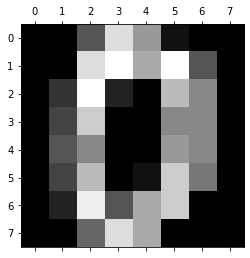

178


In [7]:
#you can see the pictures using this piece of code: 
from matplotlib import pyplot as plt
plt.gray()
plt.matshow(digits.images[0])
plt.show()
#to count the number of examples of a particular class, you can use:
Y=digits.target
print(len(Y[Y==0]))

## Our First MLPClassifier

In [12]:
from sklearn.neural_network import MLPClassifier

# Help : don't evaluate  this cell
# Read https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html 

class sklearn.neural_network.MLPClassifier(

        hidden_layer_sizes=(100, ), 
        activation='relu', 
        # Activation function
        solver='adam',  
        # solver{‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’
        alpha=0.0001,   
        # L2 penalty (regularization term) parameter.
        batch_size='auto', 
        # Size of minibatches for stochastic optimizers. 
                  # If the solver is ‘lbfgs’, 
                  # the classifier will not use minibatch. 
                  # When set to “auto”, batch_size=min(200, n_samples)
        learning_rate='constant', 
        learning_rate_init=0.001, 
        power_t=0.5, 
        max_iter=200, 
        shuffle=True, 
        random_state=None, 
        tol=0.0001, 
        ## It is about the  stopping criterium
        verbose=False, 
        warm_start=False, 
        # ?? 
        momentum=0.9, # Momentum for gradient descent update. 
                      # Should be between 0 and 1. 
                      # Only used when solver=’sgd’.
        nesterovs_momentum=True, 
        early_stopping=False, 
        validation_fraction=0.1, 
        beta_1=0.9, 
        beta_2=0.999, 
        epsilon=1e-08, 
        n_iter_no_change=10, 
        max_fun=15000)

In [15]:
from sklearn.neural_network import MLPClassifier
X = digits.data
print(X[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


# Neural network architectures

For fully connected neural networks, there are three essential questions that define the network’s architecture:

    How many layers are there?
    How many nodes are there in each of those layers?
    Input and Ouput layers are "mandatory"
    What transfer/activation function is used at each of those layers?
    
    Now, let's play. 

In [16]:
%%time
maxiter=40
clf = MLPClassifier(solver='sgd', 
                    alpha=1e-6, 
                    max_iter=maxiter, 
                    hidden_layer_sizes=(32,16),#A matrix of size (32,16) 
                    random_state=1)
clf.fit(X, Y)  # computation the Neural Network

Wall time: 733 ms


C:\Users\robert erra\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=1e-06, hidden_layer_sizes=(32, 16), max_iter=40,
              random_state=1, solver='sgd')

In [17]:
print(" Size of the different matrices ")
[coef.shape for coef in clf.coefs_]
print(64*32*16*10)

 Size of the different matrices 
327680


In [18]:
%%time
maxiter=1000
clf = MLPClassifier(solver='sgd', 
                    alpha=1e-4, 
                    max_iter=maxiter, 
                    hidden_layer_sizes=(32,16),
                    random_state=1)
clf.fit(X, Y)

Wall time: 10.5 s


MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=1000, random_state=1,
              solver='sgd')

In [19]:
# hidden_layer_sizes=(32,16),
#Input: 64
#Output: 10
print(" Size of the different matrices ")
[coef.shape for coef in clf.coefs_]

 Size of the different matrices 


[(64, 32), (32, 16), (16, 10)]

In [20]:
%%time
clf = MLPClassifier(solver='sgd', 
                    alpha=1e-5, 
                    max_iter=800, 
                    hidden_layer_sizes=(32,10),
                    random_state=1,
                    verbose=False )
clf.fit(X, Y)

Wall time: 9.9 s


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(32, 10), max_iter=800,
              random_state=1, solver='sgd')

In [21]:
%%time
maxiter=100
clf = MLPClassifier(solver='sgd', alpha=1e-5, max_iter=maxiter, hidden_layer_sizes=(32,16),random_state=1)
clf.fit(X, Y)

Wall time: 1.85 s


C:\Users\robert erra\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(32, 16), max_iter=100,
              random_state=1, solver='sgd')

In [22]:
%%time
maxiter=200
clf = MLPClassifier(solver='sgd', alpha=1e-5, max_iter=maxiter, hidden_layer_sizes=(32,16),random_state=1)
clf.fit(X, Y)

Wall time: 3.68 s


C:\Users\robert erra\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(32, 16), random_state=1,
              solver='sgd')

In [23]:
[coef.shape for coef in clf.coefs_]

[(64, 32), (32, 16), (16, 10)]

In [24]:
%%time
maxiter=400
clf = MLPClassifier(solver='sgd', alpha=1e-5, max_iter=maxiter, hidden_layer_sizes=(32,16),random_state=1)
clf.fit(X, Y)

Wall time: 7.97 s


C:\Users\robert erra\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(32, 16), max_iter=400,
              random_state=1, solver='sgd')

In [25]:
%%time
clf = MLPClassifier(solver='sgd', alpha=1e-5, max_iter=8000, hidden_layer_sizes=(32,16,8, 8,16,32),random_state=1)
clf.fit(X, Y)

Wall time: 13.4 s


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(32, 16, 8, 8, 16, 32),
              max_iter=8000, random_state=1, solver='sgd')

In [26]:
%%time
clf = MLPClassifier(solver='sgd', alpha=1e-5, max_iter=5000, hidden_layer_sizes=(32,16,8, 8,16,32),random_state=1)
clf.fit(X, Y)

Wall time: 13.9 s


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(32, 16, 8, 8, 16, 32),
              max_iter=5000, random_state=1, solver='sgd')

In [27]:
%%time
clf = MLPClassifier(solver='sgd', max_iter=1000, alpha=1e-5, hidden_layer_sizes=(10, 5),random_state=1)
clf.fit(X, Y)

Wall time: 13.4 s


C:\Users\robert erra\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 5), max_iter=1000,
              random_state=1, solver='sgd')

In [28]:
%%time
clf = MLPClassifier(solver='lbfgs', 
                    alpha=1e-5,
                    max_iter=200, 
                    hidden_layer_sizes=(32, 16),
                    random_state=1,
                    verbose=True)
clf.fit(X, Y)

Wall time: 1.72 s


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(32, 16), random_state=1,
              solver='lbfgs', verbose=True)

In [29]:
%%time
clf = MLPClassifier(solver='adam', 
                    max_iter=200, 
                    alpha=1e-5, 
                    hidden_layer_sizes=(32, 16),
                    random_state=1,
                    verbose=True)
clf.fit(X, Y)

Iteration 1, loss = 7.66475426
Iteration 2, loss = 4.24659484
Iteration 3, loss = 2.86775524
Iteration 4, loss = 2.39755771
Iteration 5, loss = 2.27395120
Iteration 6, loss = 2.20785478
Iteration 7, loss = 2.15063233
Iteration 8, loss = 2.08566234
Iteration 9, loss = 1.99291067
Iteration 10, loss = 1.86059839
Iteration 11, loss = 1.71491226
Iteration 12, loss = 1.57417038
Iteration 13, loss = 1.43874424
Iteration 14, loss = 1.30395813
Iteration 15, loss = 1.17422578
Iteration 16, loss = 1.05597388
Iteration 17, loss = 0.93655657
Iteration 18, loss = 0.81658908
Iteration 19, loss = 0.69897265
Iteration 20, loss = 0.58958359
Iteration 21, loss = 0.50609106
Iteration 22, loss = 0.44517447
Iteration 23, loss = 0.39793492
Iteration 24, loss = 0.35921104
Iteration 25, loss = 0.32875799
Iteration 26, loss = 0.30447640
Iteration 27, loss = 0.28613412
Iteration 28, loss = 0.26583703
Iteration 29, loss = 0.24781356
Iteration 30, loss = 0.22936124
Iteration 31, loss = 0.21466197
Iteration 32, los

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(32, 16), random_state=1,
              verbose=True)

# The full MNIST Dataset 

In [30]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

print(__doc__)

# Load data from https://www.openml.org/d/554
Ximg, yimg = fetch_openml('mnist_784', version=1, return_X_y=True)
Ximg = Ximg / 255. # Normalisation step: now all input data 
                   # are between  0 and 1 ([0,1])

# rescale the data, use the traditional train/test split
# X_train, X_test = X[:60000], X[60000:]
# y_train, y_test = y[:60000], y[60000:]

Automatically created module for IPython interactive environment


Iteration 1, loss = 2.19829018
Iteration 2, loss = 1.57157998
Iteration 3, loss = 0.93240301
Iteration 4, loss = 0.61401704
Iteration 5, loss = 0.46006394
Iteration 6, loss = 0.37782671
Iteration 7, loss = 0.32187857
Iteration 8, loss = 0.26448129
Iteration 9, loss = 0.22052024
Iteration 10, loss = 0.18487928
Iteration 11, loss = 0.14747825
Iteration 12, loss = 0.11970676
Iteration 13, loss = 0.10092984
Iteration 14, loss = 0.08534803
Iteration 15, loss = 0.06986844
Iteration 16, loss = 0.05788276
Iteration 17, loss = 0.05222885
Iteration 18, loss = 0.04597224
Iteration 19, loss = 0.03997837
Iteration 20, loss = 0.03579606
Iteration 21, loss = 0.03220712
Iteration 22, loss = 0.02925875
Iteration 23, loss = 0.02685601
Iteration 24, loss = 0.02452019
Iteration 25, loss = 0.02309348
Iteration 26, loss = 0.02116248
Iteration 27, loss = 0.01999929
Iteration 28, loss = 0.01863998
Iteration 29, loss = 0.01752735
Iteration 30, loss = 0.01657876
Iteration 31, loss = 0.01567594
Iteration 32, los

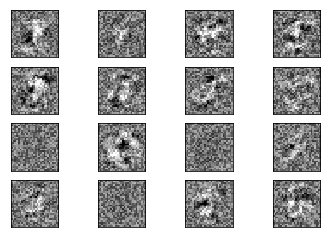

Wall time: 3.5 s


In [31]:
%%time
#  We choose the number of pictures for the Training  Phase
#  and the "rest" will be used for the Test Phase
X_train, X_test = Ximg[:600], Ximg[600:]
y_train, y_test = yimg[:600], yimg[600:]

mlp = MLPClassifier(hidden_layer_sizes=(50,), 
                    max_iter=1000, # It is a maximum 
                    alpha=1e-4,
                    solver='sgd', 
                    verbose=10, 
                    random_state=1,
                    learning_rate_init=.1)

mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

Iteration 1, loss = 2.19826290
Iteration 2, loss = 1.57155198
Iteration 3, loss = 0.93237349
Iteration 4, loss = 0.61398593
Iteration 5, loss = 0.46003114
Iteration 6, loss = 0.37779230
Iteration 7, loss = 0.32184259
Iteration 8, loss = 0.26444390
Iteration 9, loss = 0.22048146
Iteration 10, loss = 0.18483930
Iteration 11, loss = 0.14743717
Iteration 12, loss = 0.11966465
Iteration 13, loss = 0.10088676
Iteration 14, loss = 0.08530413
Iteration 15, loss = 0.06982381
Iteration 16, loss = 0.05783755
Iteration 17, loss = 0.05218298
Iteration 18, loss = 0.04592588
Iteration 19, loss = 0.03993162
Iteration 20, loss = 0.03574889
Iteration 21, loss = 0.03215959
Iteration 22, loss = 0.02921086
Iteration 23, loss = 0.02680779
Iteration 24, loss = 0.02447169
Iteration 25, loss = 0.02304464
Iteration 26, loss = 0.02111342
Iteration 27, loss = 0.01994996
Iteration 28, loss = 0.01859040
Iteration 29, loss = 0.01747756
Iteration 30, loss = 0.01652875
Iteration 31, loss = 0.01562566
Iteration 32, los

Iteration 257, loss = 0.00105152
Iteration 258, loss = 0.00104700
Iteration 259, loss = 0.00104209
Iteration 260, loss = 0.00103691
Iteration 261, loss = 0.00103322
Iteration 262, loss = 0.00102803
Iteration 263, loss = 0.00102323
Iteration 264, loss = 0.00101960
Iteration 265, loss = 0.00101404
Iteration 266, loss = 0.00100965
Iteration 267, loss = 0.00100574
Iteration 268, loss = 0.00100103
Iteration 269, loss = 0.00099706
Iteration 270, loss = 0.00099214
Iteration 271, loss = 0.00098841
Iteration 272, loss = 0.00098338
Iteration 273, loss = 0.00097972
Iteration 274, loss = 0.00097504
Iteration 275, loss = 0.00097102
Iteration 276, loss = 0.00096671
Iteration 277, loss = 0.00096301
Iteration 278, loss = 0.00095852
Iteration 279, loss = 0.00095448
Iteration 280, loss = 0.00095112
Iteration 281, loss = 0.00094658
Iteration 282, loss = 0.00094321
Iteration 283, loss = 0.00093874
Iteration 284, loss = 0.00093534
Iteration 285, loss = 0.00093121
Iteration 286, loss = 0.00092755
Iteration 

Iteration 513, loss = 0.00046939
Iteration 514, loss = 0.00046832
Iteration 515, loss = 0.00046735
Iteration 516, loss = 0.00046622
Iteration 517, loss = 0.00046532
Iteration 518, loss = 0.00046410
Iteration 519, loss = 0.00046308
Iteration 520, loss = 0.00046211
Iteration 521, loss = 0.00046108
Iteration 522, loss = 0.00046013
Iteration 523, loss = 0.00045899
Iteration 524, loss = 0.00045804
Iteration 525, loss = 0.00045690
Iteration 526, loss = 0.00045605
Iteration 527, loss = 0.00045498
Iteration 528, loss = 0.00045393
Iteration 529, loss = 0.00045310
Iteration 530, loss = 0.00045210
Iteration 531, loss = 0.00045108
Iteration 532, loss = 0.00045002
Iteration 533, loss = 0.00044901
Iteration 534, loss = 0.00044807
Iteration 535, loss = 0.00044712
Iteration 536, loss = 0.00044609
Iteration 537, loss = 0.00044520
Iteration 538, loss = 0.00044422
Iteration 539, loss = 0.00044325
Iteration 540, loss = 0.00044249
Iteration 541, loss = 0.00044139
Iteration 542, loss = 0.00044045
Iteration 

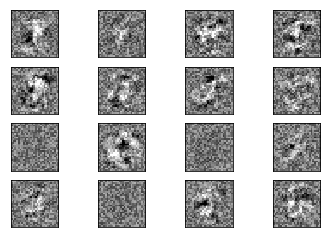

Wall time: 15.7 s


In [73]:
%%time
# WE CAN CHANGE ALPHA 
#  We choose the number of pictures for the Training  Phase
#  and the "rest" will be used for the Test Phase
X_train, X_test = Ximg[:600], Ximg[600:]
y_train, y_test = yimg[:600], yimg[600:]

mlp = MLPClassifier(hidden_layer_sizes=(50,), 
                    max_iter=1000, # It is a maximum 
                    alpha=1e-6,
                    solver='sgd', 
                    verbose=10, 
                    random_state=1,
                    learning_rate_init=.1,
                    tol=0.00000100)
                    ## It is about the  stopping criterium)

mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

Iteration 1, loss = 5.45377483
Iteration 2, loss = 2.45410401
Iteration 3, loss = 1.31558062
Iteration 4, loss = 1.21463976
Iteration 5, loss = 0.95680625
Iteration 6, loss = 0.81786866
Iteration 7, loss = 0.70512736
Iteration 8, loss = 0.61037149
Iteration 9, loss = 0.52025021
Iteration 10, loss = 0.44464663
Iteration 11, loss = 0.36670337
Iteration 12, loss = 0.33560994
Iteration 13, loss = 0.29598046
Iteration 14, loss = 0.24885841
Iteration 15, loss = 0.23532771
Iteration 16, loss = 0.20952241
Iteration 17, loss = 0.18681634
Iteration 18, loss = 0.17557802
Iteration 19, loss = 0.16256817
Iteration 20, loss = 0.15345475
Iteration 21, loss = 0.14005307
Iteration 22, loss = 0.13392494
Iteration 23, loss = 0.12290360
Iteration 24, loss = 0.11547681
Iteration 25, loss = 0.11426478
Iteration 26, loss = 0.11040794
Iteration 27, loss = 0.10841407
Iteration 28, loss = 0.10246721
Iteration 29, loss = 0.10077899
Iteration 30, loss = 0.09868897
Iteration 31, loss = 0.09841236
Iteration 32, los

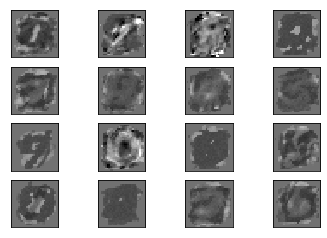

Wall time: 4.87 s


In [65]:
%%time
mlp = MLPClassifier(hidden_layer_sizes=(50,), 
                    max_iter=200, 
                    alpha=1e-4,
                    solver='adam', 
                    verbose=10, 
                    random_state=1,
                    learning_rate_init=.1)

mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

Training set score: 1.000000
Test set score: 0.830937


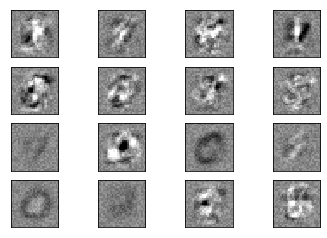

In [66]:
mlp = MLPClassifier(hidden_layer_sizes=(50,), 
                    max_iter=100, 
                    alpha=1e-5,
                    solver='lbfgs', 
                    verbose=10, 
                    random_state=1,
                    learning_rate_init=.1)

mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

Iteration 1, loss = 2.24164767
Iteration 2, loss = 1.63928472
Iteration 3, loss = 0.98960200
Iteration 4, loss = 0.62778256
Iteration 5, loss = 0.45920324
Iteration 6, loss = 0.37293359
Iteration 7, loss = 0.31115082
Iteration 8, loss = 0.26909470
Iteration 9, loss = 0.21966441
Iteration 10, loss = 0.17973303
Iteration 11, loss = 0.14660662
Iteration 12, loss = 0.12315614
Iteration 13, loss = 0.10286763
Iteration 14, loss = 0.08367113
Iteration 15, loss = 0.07002081
Iteration 16, loss = 0.06060221
Iteration 17, loss = 0.05151829
Iteration 18, loss = 0.04406895
Iteration 19, loss = 0.03872422
Iteration 20, loss = 0.03457372
Iteration 21, loss = 0.03100581
Iteration 22, loss = 0.02804136
Iteration 23, loss = 0.02580862
Iteration 24, loss = 0.02356337
Iteration 25, loss = 0.02200329
Iteration 26, loss = 0.02048906
Iteration 27, loss = 0.01923945
Iteration 28, loss = 0.01795785
Iteration 29, loss = 0.01701027
Iteration 30, loss = 0.01605496
Iteration 31, loss = 0.01525443
Iteration 32, los

Iteration 257, loss = 0.00104037
Iteration 258, loss = 0.00103616
Iteration 259, loss = 0.00103185
Iteration 260, loss = 0.00102663
Iteration 261, loss = 0.00102219
Iteration 262, loss = 0.00101732
Iteration 263, loss = 0.00101311
Iteration 264, loss = 0.00100830
Iteration 265, loss = 0.00100398
Iteration 266, loss = 0.00099945
Iteration 267, loss = 0.00099504
Iteration 268, loss = 0.00099151
Iteration 269, loss = 0.00098615
Iteration 270, loss = 0.00098246
Iteration 271, loss = 0.00097810
Iteration 272, loss = 0.00097379
Iteration 273, loss = 0.00096987
Iteration 274, loss = 0.00096599
Iteration 275, loss = 0.00096124
Iteration 276, loss = 0.00095715
Iteration 277, loss = 0.00095329
Iteration 278, loss = 0.00094943
Iteration 279, loss = 0.00094503
Iteration 280, loss = 0.00094118
Iteration 281, loss = 0.00093788
Iteration 282, loss = 0.00093361
Iteration 283, loss = 0.00092979
Iteration 284, loss = 0.00092633
Iteration 285, loss = 0.00092251
Iteration 286, loss = 0.00091871
Iteration 

Iteration 508, loss = 0.00047250
Iteration 509, loss = 0.00047162
Iteration 510, loss = 0.00047042
Iteration 511, loss = 0.00046937
Iteration 512, loss = 0.00046835
Iteration 513, loss = 0.00046726
Iteration 514, loss = 0.00046619
Iteration 515, loss = 0.00046515
Iteration 516, loss = 0.00046409
Iteration 517, loss = 0.00046307
Iteration 518, loss = 0.00046204
Iteration 519, loss = 0.00046102
Iteration 520, loss = 0.00046009
Iteration 521, loss = 0.00045901
Iteration 522, loss = 0.00045804
Iteration 523, loss = 0.00045697
Iteration 524, loss = 0.00045608
Iteration 525, loss = 0.00045518
Iteration 526, loss = 0.00045408
Iteration 527, loss = 0.00045295
Iteration 528, loss = 0.00045204
Iteration 529, loss = 0.00045104
Iteration 530, loss = 0.00044999
Iteration 531, loss = 0.00044900
Iteration 532, loss = 0.00044814
Iteration 533, loss = 0.00044724
Iteration 534, loss = 0.00044621
Iteration 535, loss = 0.00044516
Iteration 536, loss = 0.00044423
Iteration 537, loss = 0.00044341
Iteration 

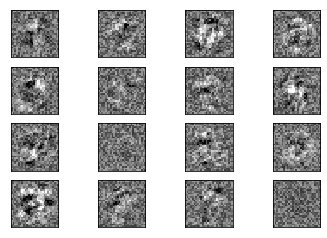

Wall time: 16 s


In [74]:
%%time
# WE CAN CHANGE ALPHA 
#  We choose the number of pictures for the Training  Phase
#  and the "rest" will be used for the Test Phase
X_train, X_test = Ximg[:600], Ximg[600:]
y_train, y_test = yimg[:600], yimg[600:]

mlp = MLPClassifier(hidden_layer_sizes=(60,), 
                    max_iter=1000, # It is a maximum 
                    alpha=1e-6,
                    solver='sgd', 
                    verbose=10, 
                    random_state=1,
                    learning_rate_init=.1,
                    tol=0.00000100)
                    ## It is about the  stopping criterium)

mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

In [81]:
A=clf.coefs_[2]
print(A)

[[-1.04002457, 0.03], [0.4, 0.03], [1.1148241, 0.04]]


In [78]:
clf.coefs_[2]=[[-1.04002457,  0.03],
 [ 0.4,  0.03],
[1.1148241,  0.04]]
U,S,VT=np.linalg.svd(A)
print(S)

[[-1.36159980e-04  6.71349684e-04 -4.13539676e-03 ...  2.10294763e-03
  -2.42189318e-03 -1.26898483e-04]
 [ 2.76274033e-01 -4.47315885e-02  1.08798164e-01 ... -1.09421561e-01
   5.73299871e-02 -7.89209704e-02]
 [-1.96462773e-01 -3.79991640e-02  9.30312952e-02 ... -5.22575692e-03
  -1.17806951e-02 -1.15015011e-01]
 ...
 [ 1.43438886e-01  5.68098669e-02 -2.09824051e-01 ...  1.86748954e-01
   2.24792271e-01  2.55260491e-01]
 [-5.02576439e-02 -1.18450216e-01  2.25613782e-02 ... -4.70455574e-02
  -2.35276185e-01 -4.80072298e-03]
 [-1.48822562e-01  2.27936384e-02  2.09350520e-01 ... -1.51700259e-01
  -2.29918622e-03 -8.11906907e-02]]
[2.14280255 2.05028511 1.96280737 1.9146546  1.79800911 1.76475403
 1.67095661 1.61806024 1.53926433 1.50068505 1.3932761  1.36276471
 1.31398302 1.24509814 1.20595562 1.16812271 1.13159941 1.07445537
 1.04393607 0.99578969 0.98377204 0.89126921 0.82852964 0.81295598
 0.80479239 0.71265247 0.66852778 0.62963198 0.58035214 0.53923903
 0.49701641 0.00983188]


In [ ]:
print(clf.coefs_)

In [ ]:
A=clf.coefs_[0]
U,S,VT=np.linalg.svd(A)
print(S)

In [ ]:
A=clf.coefs_[1]
U,S,VT=np.linalg.svd(A)
print(S)

In [ ]:
A=clf.coefs_[2]
U,S,VT=np.linalg.svd(A)
print(S)

In [ ]:
A=clf.coefs_[3]
U,S,VT=np.linalg.svd(A)
print(S)

# A smaller example: the XOR function

In [82]:
from sklearn.neural_network import MLPClassifier

In [87]:
# Remember the XOR function gives
# 0 XOR 0 =1
# 0 XOR 1 =1
# 1 XOR 0 =1
# 1 XOR 1 =0
X = [[0, 0], [1, 1],[0,1],[1,0]]
y = [0, 0,1,1]
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5,2), random_state=1)
clf.fit(X, y)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [89]:
# We can ask for any value but be careful not to  overestimate the results
print(clf.predict([[0.50000,0.500000]]))
print(clf.predict([[0.99,0.99]]))
print(clf.predict([[0.95,0.95]]))
print(clf.predict([[0,0.00001]]))

[1]
[0]
[1]
[0]


In [90]:
from sklearn.neural_network import MLPClassifier
X = [[0., 0.], [1., 1.],[0.0001, 0.0001], [0.9, 1.0002]]
y = [0, 1,0,1]
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5,2), random_state=1)
clf.fit(X, y)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [93]:
print(clf.predict([[0.5,0.55]]))
print(clf.predict([[0.99,0.99]]))
print(clf.predict([[0.9,0.9]]))

[0]
[1]
[1]


In [165]:
D=[[2., 2.], [-1., -2.],[0, 1.],[0, 0.],[0,1]]
clf.predict(D)
# array([1, 0, 0, 0, 0])

array([1, 0, 0, 0, 0])

In [112]:
# We add a label: -1 

In [166]:
from sklearn.neural_network import MLPClassifier
X = [[0., 0.], [1., 1.], [0.001, 0.002], [1.001, 1.0002],[0,0.5],[0.5,0]]
y = [0, 1,0,1,-1,-1]
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5,2), random_state=1)
clf.fit(X, y)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [169]:
D=[[2., 2.], [-1., -2.],[0, 1.],[0, 0.],[0,1], [0,0.5],[0.5,0]]
clf.predict(D)
# array([1, 0, 0, 0, 0])

array([1, 0, 0, 0, 0, 0, 0])

In [150]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(4,4), random_state=1)
clf.fit(X, y)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(4, 4), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [151]:
D=[[2., 2.], [-1., -2.],[0, 1.],[0, 0.],[0,1]]
clf.predict(D)
# not good

array([1, 0, 0, 0, 0])

In [152]:
[coef.shape for coef in clf.coefs_]

[(2, 4), (4, 4), (4, 1)]

In [153]:
# The array of all layers: Matrices
print(clf.coefs_)

[array([[-0.16593727,  0.44059927, -0.99965845, -0.39529025],
       [-0.70640851, -0.81523082, -0.62740878, -0.3088437 ]]), array([[-0.51184596,  0.65484472, -0.81849634,  0.29522508],
       [-0.14321612,  0.24084038, -0.62279782, -0.52284456],
       [ 0.5208461 ,  0.81096133, -0.32312234,  0.33307496],
       [ 0.65185158,  1.35122771, -0.71864342, -0.79829046]]), array([[ 1.00307251],
       [-1.0203715 ],
       [ 0.42033427],
       [-0.4041394 ]])]


In [154]:
print(clf.coefs_[0])

[[-0.16593727  0.44059927 -0.99965845 -0.39529025]
 [-0.70640851 -0.81523082 -0.62740878 -0.3088437 ]]


In [155]:
A=clf.coefs_[0]
U,S,VT=np.linalg.svd(A)
print(S)

[1.42849609 0.99462239]


In [156]:
A=clf.coefs_[1]
U,S,VT=np.linalg.svd(A)
print(S)

[2.19412955 1.05696282 0.88224397 0.16327871]


In [157]:
A=clf.coefs_[2]
U,S,VT=np.linalg.svd(A)
print(S)

[1.54509612]


In [161]:
print(D)
print(clf.predict(D))
print(clf.predict_proba(D))

[[2.0, 2.0], [-1.0, -2.0], [0, 1.0], [0, 0.0], [0, 1]]
[1 0 0 0 0]
[[0.26535374 0.73464626]
 [0.98233053 0.01766947]
 [0.55869225 0.44130775]
 [0.63657902 0.36342098]
 [0.55869225 0.44130775]]


# A full example
## Be careful: you need enough  memory

In [170]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

print(__doc__)

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255.

# rescale the data, use the traditional train/test split
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, random_state=1,
                    learning_rate_init=.1)

mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

Automatically created module for IPython interactive environment


MemoryError: Unable to allocate array with shape (54950000,) and data type float64

# Compare Stochastic learning strategies for MLPClassifier¶ 
## https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_training_curves.html#sphx-glr-auto-examples-neural-networks-plot-mlp-training-curves-py

In [ ]:
print(__doc__)

import warnings

import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
from sklearn.exceptions import ConvergenceWarning

In [95]:
# different learning rate schedules and momentum parameters
params = [{'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': True, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': True, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'adam', 'learning_rate_init': 0.01}]

In [96]:
labels = ["constant learning-rate", "constant with momentum",
          "constant with Nesterov's momentum",
          "inv-scaling learning-rate", "inv-scaling with momentum",
          "inv-scaling with Nesterov's momentum", "adam"]

In [97]:
plot_args = [{'c': 'red', 'linestyle': '-'},
             {'c': 'green', 'linestyle': '-'},
             {'c': 'blue', 'linestyle': '-'},
             {'c': 'red', 'linestyle': '--'},
             {'c': 'green', 'linestyle': '--'},
             {'c': 'blue', 'linestyle': '--'},
             {'c': 'black', 'linestyle': '-'}]

In [100]:
def plot_on_dataset(X, y, ax, name):
    # for each dataset, plot learning for each learning strategy
    print("\nlearning on dataset %s" % name)
    ax.set_title(name)

    X = MinMaxScaler().fit_transform(X)
    mlps = []
    if name == "digits":
        # digits is larger but converges fairly quickly
        max_iter = 15
    else:
        max_iter = 400

    for label, param in zip(labels, params):
        print("training: %s" % label)
        mlp = MLPClassifier(random_state=0,
                            max_iter=max_iter, **param)

        # some parameter combinations will not converge as can be seen on the
        # plots so they are ignored here
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=ConvergenceWarning,
                                    module="sklearn")
            mlp.fit(X, y)

        mlps.append(mlp)
        print("Training set score: %f" % mlp.score(X, y))
        print("Training set loss: %f" % mlp.loss_)
    for mlp, label, args in zip(mlps, labels, plot_args):
        ax.plot(mlp.loss_curve_, label=label, **args)

NameError: name 'datasets' is not defined

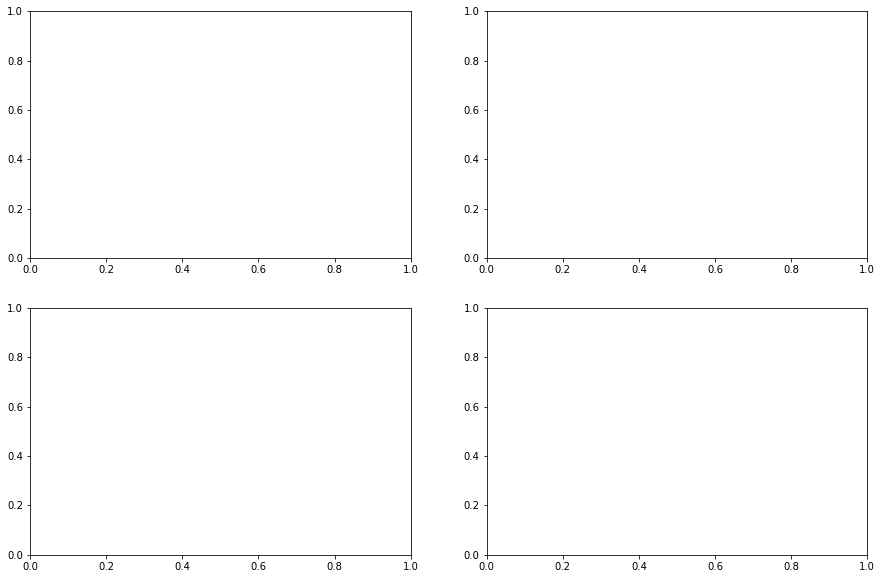

In [101]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
# load / generate some toy datasets
iris = datasets.load_iris()
X_digits, y_digits = datasets.load_digits(return_X_y=True)
data_sets = [(iris.data, iris.target),
             (X_digits, y_digits),
             datasets.make_circles(noise=0.2, factor=0.5, random_state=1),
             datasets.make_moons(noise=0.3, random_state=0)]

In [176]:
for ax, data, name in zip(axes.ravel(), data_sets, ['iris', 'digits',
                                                    'circles', 'moons']):
    plot_on_dataset(*data, ax=ax, name=name)

fig.legend(ax.get_lines(), labels, ncol=3, loc="upper center")
plt.show()


learning on dataset iris
training: constant learning-rate
Training set score: 0.980000
Training set loss: 0.096950
training: constant with momentum
Training set score: 0.980000
Training set loss: 0.049530
training: constant with Nesterov's momentum
Training set score: 0.980000
Training set loss: 0.049540
training: inv-scaling learning-rate
Training set score: 0.360000
Training set loss: 0.978444
training: inv-scaling with momentum
Training set score: 0.860000
Training set loss: 0.503452
training: inv-scaling with Nesterov's momentum
Training set score: 0.860000
Training set loss: 0.504185
training: adam
Training set score: 0.980000
Training set loss: 0.045311

learning on dataset digits
training: constant learning-rate
Training set score: 0.956038
Training set loss: 0.243802
training: constant with momentum
Training set score: 0.992766
Training set loss: 0.041297
training: constant with Nesterov's momentum
Training set score: 0.993879
Training set loss: 0.042898
training: inv-scaling 